## 1. Estudo do índice Sharp para as principais cripitomoedas ao longo do ano de 2021

O índice Sharpe tem sido uma das medidas de risco/retorno mais populares em finanças, pois é relativamente simples e fácil de ser interpretada. Também serviu de base para que o professor Willian Sharpe ganhasse um Prêmio Nobel de Economia em 1990 por seu trabalho no modelo de precificação de ativos de capital (CAPM).

Este índice se baseia na idea de se ponderar os retornos de diferentes portifólios (ou ações) com seus níveis de volatilidade, produzindo um medida comparativa entre as possíveis escolhas de alocação em carteira para que então, o investidor tenha base sólida para a tomada de decisão de investimento.

O presente estudo visa calcular o índice Sharp para as mais populares criptomoedas do mercado (Bitcoin, Ethereum, Tether, USD Coin e Binance Coin) afim de avaliar qual o ativo mais vantajoso em termos de risco-retorno. 

Como ajuste ao modelo, utilizar-se-a como benchmark para o excesso de retorno os dados do Ibovespa ao inves da taxa livre de risco da economia

Todos os dados foram extraídos do Yahoo Finance 

In [10]:
# Importar as bibliotecas relevantes
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as wb
from datetime import date
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

# Extração dos dados
lista_criptos = ["BTC-USD","ETH-USD","USDT-USD","USDC-USD","BNB-USD"]
nomes_colunas = ["Bitcoin", "Ethereum", "Tether", "USD Coin", "Binance Coin"]
start_d = date(2021,1,1)
end_d = date(2021,12,31)

criptos = wb.DataReader(lista_criptos, data_source = "yahoo", start = start_d, end = end_d)["Adj Close"]
criptos.columns = nomes_colunas

ibovespa = wb.DataReader("^BVSP", data_source = "yahoo", start = start_d, end = end_d)["Adj Close"]
ibovespa.columns = ["Ibovespa"]

## 2. Primeira Análise dos dados (Exploratória)
<p>Primeiramente vamos analisar a disposição dos dados e ter uma primeira visualização das informações.</p>

In [11]:
# Sumário dos dados de cripto

print(criptos.head())

print(criptos.info())

# Sumário dos dados da bolsa brasileira

print(ibovespa.head())

print(pd.DataFrame(ibovespa).info())


                 Bitcoin     Ethereum    Tether  USD Coin  Binance Coin
Date                                                                   
2021-01-01  29374.152344   730.367554  1.001916  0.999823     37.905010
2021-01-02  32127.267578   774.534973  1.000600  1.000162     38.241592
2021-01-03  32782.023438   975.507690  1.000514  0.999736     41.148979
2021-01-04  31971.914062  1040.233032  1.000128  0.999372     40.926353
2021-01-05  33992.429688  1100.006104  1.002202  0.999749     41.734600
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-01-01 to 2022-01-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bitcoin       366 non-null    float64
 1   Ethereum      366 non-null    float64
 2   Tether        366 non-null    float64
 3   USD Coin      366 non-null    float64
 4   Binance Coin  366 non-null    float64
dtypes: float64(5)
memory usage: 17.2 KB
None
Date
2021-01-04    118558


## 3. Visualizar e Sumarizar os dados das Criptomoedas
<p>É importante também visualizar o comporamento da série histórica das criptomoedas em 2021 e opter as principais estatísticas descritivas.</p>

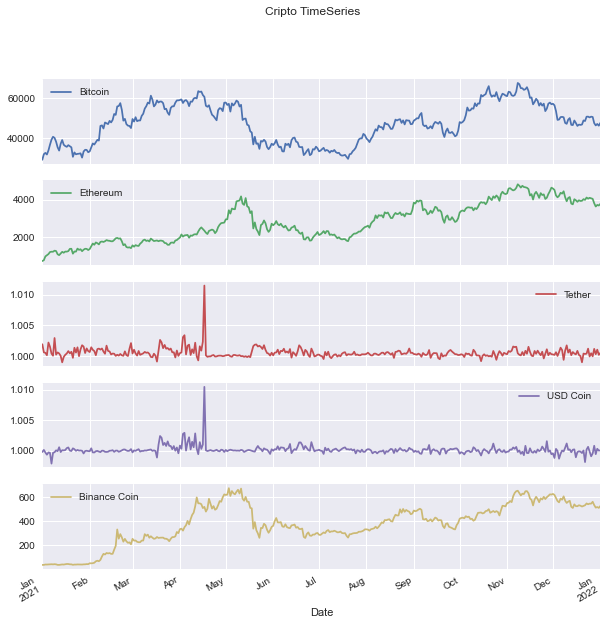

,Bitcoin,Ethereum,Tether,USD Coin,Binance Coin
count,366.000000,366.000000,366.000000,366.000000,366.000000
mean,47437.614754,2781.062736,1.000530,1.000170,378.712212
std,9774.226484,1023.453259,0.000844,0.000764,168.930043
min,29374.152344,730.367554,0.998964,0.997912,37.905010
25%,38349.407227,1896.370392,1.000105,0.999893,287.621925
50%,47747.423828,2638.554688,1.000374,1.000075,381.837357
75%,56187.017578,3671.505127,1.000781,1.000285,517.682495
max,67566.828125,4812.087402,1.011530,1.010496,675.684082


In [12]:
# Visualizando a performance das criptomoedas

criptos.plot(subplots = True, title = "Cripto TimeSeries", figsize = (10,10))
plt.show()

# Sumarizando os Dados das Criptomoedas

criptos.describe()

## 4. Visualizar e Sumarizar os dados para o Ibovespa
<p>Também deve-se realizar o mesmo processo para o benchmark que utilizaremos no estudo.</p>

count       247.000000
mean     116892.493927
std        7590.697730
min      100775.000000
25%      111145.500000
50%      117904.000000
75%      122129.000000
max      130776.000000
Name: Adj Close, dtype: float64

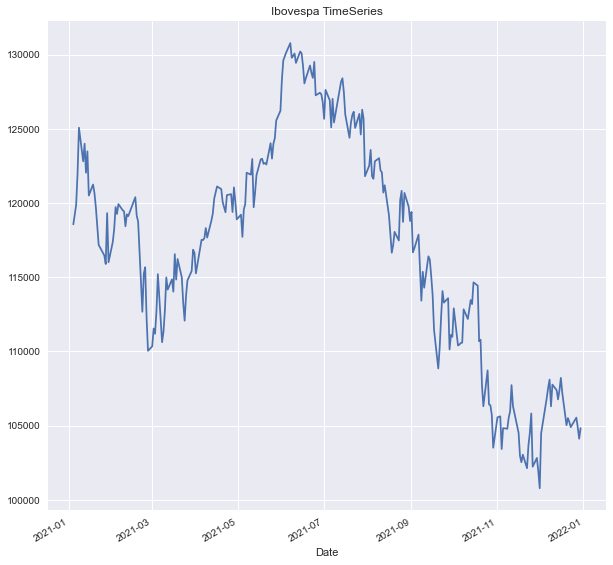

In [13]:
# Visualizando a performance do Benchmark

ibovespa.plot(title = "Ibovespa TimeSeries", figsize = (10,10))
plt.show

# summarize the benchmark_data
ibovespa.describe()

## 5. Cálculo dos imputs para o índice Sharp: Retornos Diários
<p>O Índice sharpe utiliza como base os retornos históricos de um ativo financeiro ou portifólio.</p>
<p>Entretando, os dados apresentam apenas as cotações históricas. Para realizar os ajustes que a fórmula do indice Sharpe pede, vamos aplicar algumas transformações na base dados para obter os retornos históricos diários</p>

,Bitcoin,Ethereum,Tether,USD Coin,Binance Coin
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.002211,0.006075,-0.000003,0.000001,0.009992
std,0.042111,0.055999,0.001026,0.000954,0.077368
min,-0.137661,-0.272003,-0.011296,-0.010293,-0.332656
25%,-0.021816,-0.022262,-0.000343,-0.000265,-0.025235
50%,0.001348,0.005968,-0.000031,0.000008,0.005631
75%,0.025407,0.036756,0.000312,0.000252,0.038021
max,0.187465,0.259475,0.009164,0.009453,0.697604


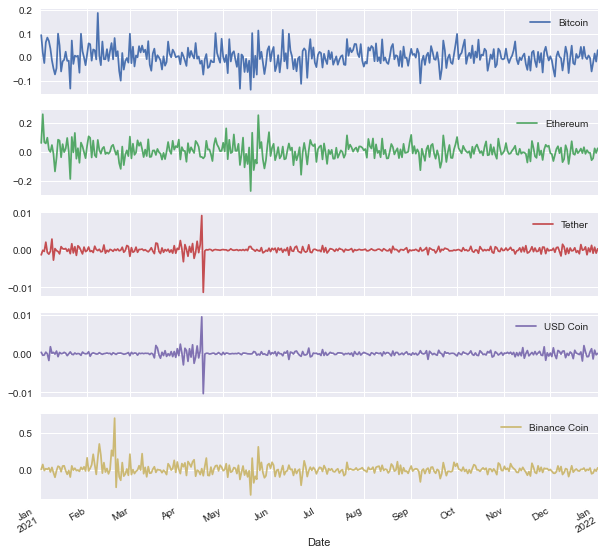

In [14]:
# Calculando os retornos diários para as cripto moedas
criptos_retornos = criptos.pct_change()


criptos_retornos.plot(subplots = True, figsize = (10,10))

# Sumário dos retornos diários

criptos_retornos.describe()


## 6. Retornos do Ibovespa
<p>Analogamente, vamos repetir o processo para o  encontrando os retornos diários a partir da serie histórica</p>

count    246.000000
mean      -0.000413
std        0.013200
min       -0.051201
25%       -0.008404
50%        0.000607
75%        0.008292
max        0.036626
Name: Adj Close, dtype: float64

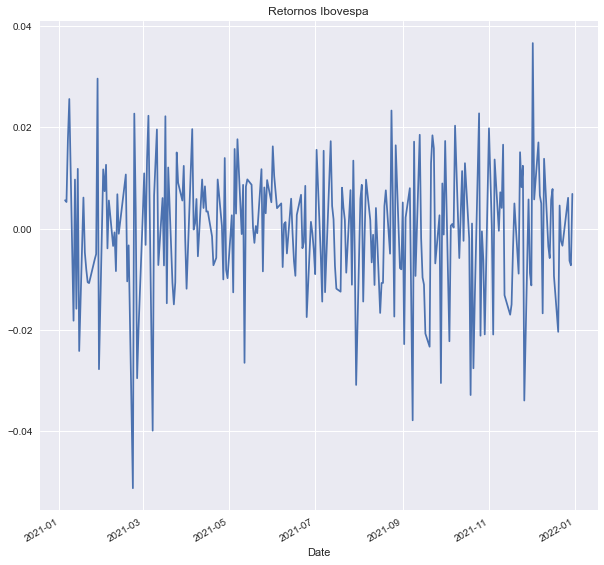

In [15]:
# Calculando os retornos diários para o ibovespa

ibovespa_retornos = ibovespa.pct_change()

# Plotando os retornos diários

ibovespa_retornos.plot(title = "Retornos Ibovespa", figsize = (10,10))


# Sumarizando os retornos diários

ibovespa_retornos.describe()


## 7. Cálculo do Excesso de Retorno: Criptos vs Ibovespa
<p>Agora deve-se contrapor os retornos das criptomoedas com o retorno do ibovespa para encontrar o excesso de retorno. Essa métrica nos indica o quanto cada moeda performou além do referencial de mercado para o ano de 2021</p>

,Bitcoin,Ethereum,Tether,USD Coin,Binance Coin
count,246.000000,246.000000,246.000000,246.000000,246.000000
mean,0.003112,0.005357,0.000405,0.000418,0.013748
std,0.044971,0.058830,0.013231,0.013253,0.087209
min,-0.134864,-0.269206,-0.036707,-0.037380,-0.329859
25%,-0.024291,-0.028684,-0.008291,-0.008396,-0.033521
50%,0.001578,0.006992,-0.000712,-0.000500,0.006231
75%,0.029425,0.041453,0.008209,0.008116,0.045080
max,0.190875,0.241390,0.050980,0.051330,0.700894


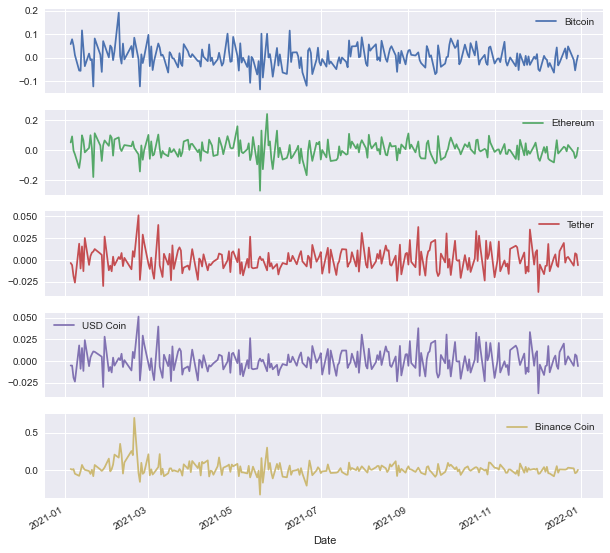

In [16]:
# Calculo das diferenças do retorno das criptomoedas com o benchmark
retorno_excessivo = criptos_retornos.sub(ibovespa_retornos, axis = 0).dropna()

# Plot do excesso de retorno

retorno_excessivo.plot(subplots = True, figsize = (10,10))

# Sumarizando o excesso de retorno

retorno_excessivo.describe()

## 8. índice Sharp Passo 1: Calculo da Média do Excesso de Retorno
<p>Agora precisamos simplificar a performance histórica do excesso de retorno para cada ativo através da média dos dados.</p>

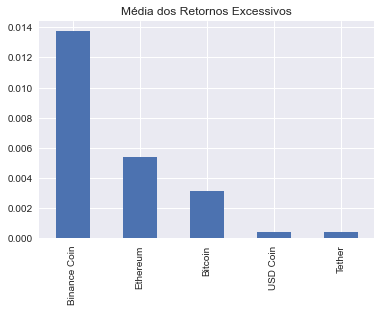

Bitcoin         0.003112
Ethereum        0.005357
Tether          0.000405
USD Coin        0.000418
Binance Coin    0.013748
dtype: float64

In [17]:
# Cálculo da média dos retornos excessivos 
med_retornos_excessivos = retorno_excessivo.mean()

# Plot da média dos retornos

med_retornos_excessivos.sort_values(ascending = False).plot(kind = "bar", title = "Média dos Retornos Excessivos")
plt.show()

med_retornos_excessivos

## 9. O Índice Sharp, passo 2: Desvio Padrão para o Excesso de Retorno
<p>Mesmo tendo encontrado qual ação é melhor em termos de rentabilidade, ainda necessitamos avaliar se esses retornos compensam o nível de risco do ativo. Por isso, deve-se calibrar os calculos utilizando o desvio-padrão.</p>

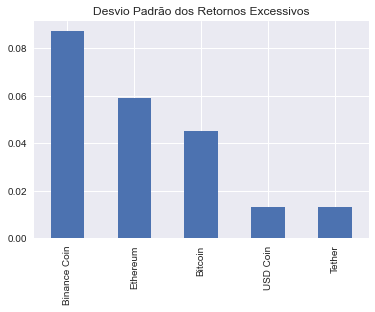

In [18]:
# Desvio padrão dos retornos excessivos
dp_retornos_excessivos = retorno_excessivo.std()

# plot the standard deviations
dp_retornos_excessivos.sort_values(ascending = False).plot(kind = "bar", title = "Desvio Padrão dos Retornos Excessivos")
plt.show()

## 10. Sintetizando e Calculando o Sharp
<p>Agora basta dividir as medidas da média dos retornos históricos pela medida de desvio dos retornos históricos das criptomoedas.</p>
<p>Em geral o índice é calculado sob bases anualizadas, assim utilizaremos a proporção de dias de trading na bolsa de valores como: √252</p>

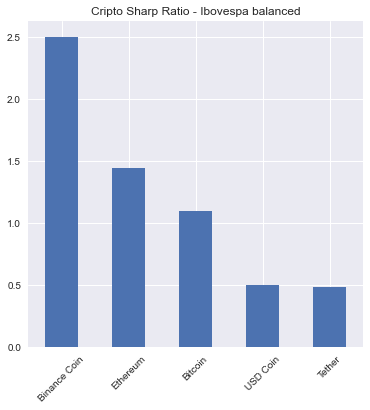

Binance Coin    2.502557
Ethereum        1.445422
Bitcoin         1.098574
USD Coin        0.500602
Tether          0.485984
dtype: float64


In [21]:
# Índice Sharp diário:
daily_sharpe_ratio = med_retornos_excessivos.div(dp_retornos_excessivos)

# annualize the sharpe ratio
anualização = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(anualização)

# plot the annualized sharpe ratio

annual_sharpe_ratio.sort_values(ascending = False).plot(kind = "bar", title = "Cripto Sharp Ratio - Ibovespa balanced", figsize = (6,6))
plt.xticks(rotation = 45)
plt.show()

print(annual_sharpe_ratio.sort_values(ascending = False))

## 11. Conclusion
<p>Dado o índice sharp calculado para as 5 criptomoedas, aquela que apresentou a melhor performance em torno de risco-retorno foi a Binance Coin com um Sharpe de 2,5. Isso mostra que para cada unidade adicionar de risco, o ativo valoriza em 2.5 pontos percentuais.</p>
<p>Vale resaltar a performance do USD Coin e do Tether que apresentam indices Sharp abaixo de 1, o que signifca que o risco cresce mais que os retornos do ativo, sendo portanto, opções que o investidor deve evitar alocar em seu portifólio. <p>

In [20]:
# Melhor Escolha (Best Option).

buy_binance = True